<h1 style="color: green; font-weight : bold">Assignment 1</h1>
<h2 style=" color : yellow;" >Machine learning Algorithm - Created By Khushbu</h2>

<hr style="width:100vw">
<h1 style="color: red; font-weight: bold; text-shadow: 1px 1px 2px white;">## Lung Cancer Prediction Lesson</h1>

## <h1 style="color: pink;; text-shadow: 1px 1px 2px white;">Introduction</h1>
In this lesson, we will learn how to build a machine learning model to predict lung cancer based on various health parameters. 

**Topics Covered:**  
- Data Exploration
- Visualizing the Data
- Logistic Regression Model
- Answering the Question


<h2 style="color: red; font-weight: bold; text-shadow: 1px 1px 2px white;">## Dataset
</h2>

<h3 style="color: pink; font-size:1.25rem"><li>For this lesson, we are using a dataset on lung cancer detection.
<br><br>
The dataset contains information on several factors that could influence lung cancer, such as:
<br>
- AGE: The patient’s age.
<br>
- GENDER: Male (M) or Female (F).
<br>
- ALCOHOL CONSUMING: Whether the person consumes alcohol.
<br>
- PEER_PRESSURE: Influence from peers.
<br>
- COUGHING: Presence of coughing (symptom).
<br>
- LUNG_CANCER: Target variable (1 = Cancer, 0 = No Cancer).</h3>


<h3 style="color:skyblue"><li>Link to Dataset: (https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer)_</h3>


<h2 style="color: red; font-weight: bold; text-shadow: 1px 1px 2px white;">## Question</h2>

<ol>
<li><p style="color: pink; text-shadow: 1px 1px 2px red;">The primary question this lesson seeks to answer is:  <br>
Can we predict whether a patient has lung cancer based on health-related data such as age, smoking habits, coughing, and other symptoms?
</h3>
</ol>

<hr style="width:100vw">
<h1 style="color: red; font-weight: bold; text-shadow: 1px 1px 2px white;">### Dataset Loading and Exploration
<h3 style="color: pink; font-size:1.25rem">

Here, we import the dataset using `pandas`. The `info()` function shows the structure, data types, and non-null values. The `head()` function displays the first few rows to get an idea of the data.

</h3>


In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
lungCancer=pd.read_csv('lungCancer.csv')

In [179]:
lungCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    int64 
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [180]:
lungCancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


<hr style="width:100vw">
<h1 style="color: red; font-weight: bold; text-shadow: 1px 1px 2px white;">### Data Preprocessing

<h3 style="color: pink; font-size:1.25rem">

Since the **GENDER** column contains categorical values ('M' and 'F'), we replace them with numerical values (0 = Male, 1 = Female). This allows us to use the data effectively in machine learning algorithms.
<h3 style="color: pink; font-size:1.25rem">



In [234]:
lungCancer.replace('M',0,inplace=True)

In [235]:
lungCancer.replace('F',1,inplace=True)

## <h1 style="font-weight: bold; color: red; text-shadow: 1px 1px 2px pink; opacity:0.8;"> ALCOHOL_CONSUMING vs LUNG_CANCER</h1>

<p style="color: pink; font-size:1.25rem">This bar plot shows the relationship between alcohol consumption and lung cancer. It helps us understand if individuals who consume alcohol are more likely to develop lung cancer.
 </p>

<Axes: xlabel='LUNG_CANCER', ylabel='ALCOHOL CONSUMING'>

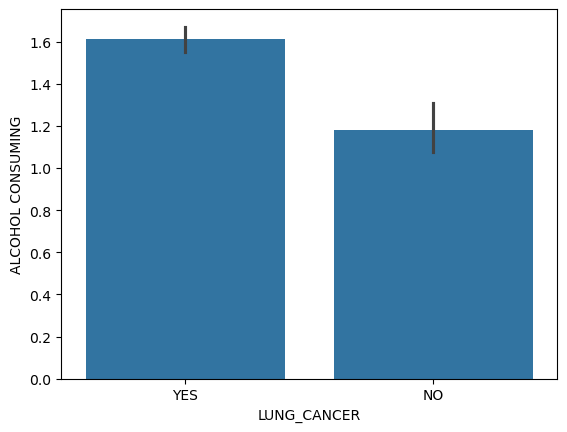

In [191]:
sns.barplot(y='ALCOHOL CONSUMING',x='LUNG_CANCER',data=lungCancer)

## <h1 style="font-weight: bold; color: red; text-shadow: 1px 1px 2px pink; opacity:0.8;"> PEER_PRESSURE vs LUNG_CANCER</h1>

<p style="color: pink; font-size:1.25rem">This bar plot explores the correlation between peer pressure and lung cancer. It helps us understand whether external influences have any effect on lung cancer incidence.</p>




<Axes: xlabel='LUNG_CANCER', ylabel='PEER_PRESSURE'>

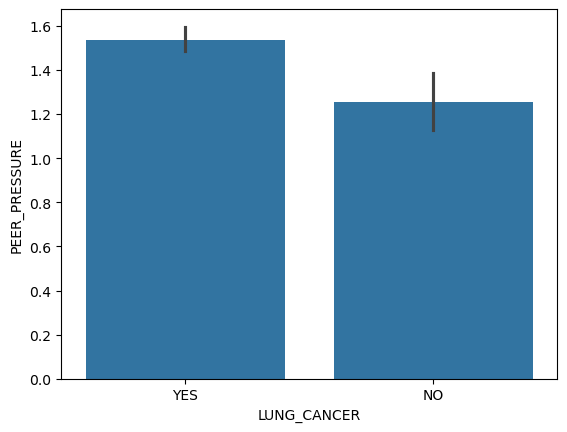

In [207]:
sns.barplot(y='PEER_PRESSURE',x='LUNG_CANCER',data=lungCancer)

## <h1 style="font-weight: bold; color: red; text-shadow: 1px 1px 2px pink; opacity:0.8;"> COUNT vs AGE</h1>

<p style="color: pink; font-size:1.25rem">
This graph shows the distribution of patients' ages in the dataset. Understanding the age range helps in analyzing which age groups are more affected by lung cancer.

</p>

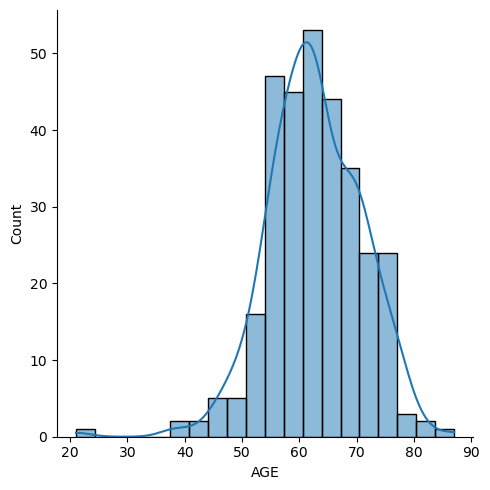

In [233]:
sns.displot(lungCancer['AGE'], kde=True,bins=20)

## <h1 style="font-weight: bold; color: red; text-shadow: 1px 1px 2px pink; opacity:0.8;"> COUGHING vs LUNG_CANCER</h1>

<p style="color: pink; font-size:1.25rem">
-- The Bar Graph below is representing it clearly that people who cough more have the the lung cancer than the ones who cough less, <br>
or it could be said that people with Lung Cancer cough more likely.
</p>

<Axes: xlabel='LUNG_CANCER', ylabel='COUGHING'>

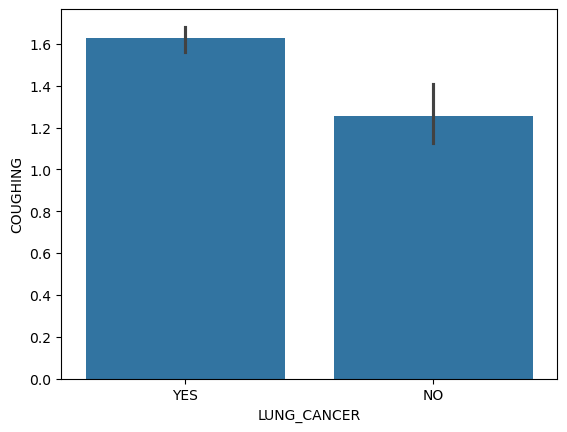

In [200]:
sns.barplot(y='COUGHING',x='LUNG_CANCER',data=lungCancer)


## <h2 style="font-weight: bold; color: red; text-shadow: 1px 1px 2px pink; opacity:0.8;"> Building and Training the Model


</h3>

<p style="color: pink; font-size:1.25rem">
We will use Logistic Regression to train our model on the lung cancer dataset. Logistic Regression is suitable for binary classification problems like this one.</p>

In [214]:
#Remove the dependent data (our y) from our independent data (our x values)
X, y = lungCancer.drop('LUNG_CANCER', axis=1), lungCancer['LUNG_CANCER'].values

<hr style="width:100vw">


<h1 style="color: red; font-weight: bold; text-shadow: 1px 1px 2px white;">### Splitting the Data

<h3 style="color: pink; font-size:1.25rem">
Here, we split the dataset into features (`X`) and target (`y`). The `train_test_split` function creates two sets: 
- Training Set: 70% of the data used to train the model.
- Testing Set: 30% used to evaluate the model.

<h3 style="color: pink; font-size:1.25rem">



In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=87)

<h1 style="color: red; font-weight: bold; text-shadow: 1px 1px 2px white;">### Training the Logistic Regression Model

<h3 style="color: pink; font-size:1.25rem">
We use Logistic Regression for this classification task. It’s a popular algorithm for binary classification, where the target is either 0 (No Cancer) or 1 (Cancer). The model learns the relationships between features and the target variable.
</h3>


In [216]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=400)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=400)

<h1 style="color: red; font-weight: bold; text-shadow: 1px 1px 2px white;">### Making Predictions and Evaluating the Model

<h3 style="color: pink; font-size:1.25rem">
The trained model is used to predict lung cancer for the test data. The **classification report** shows:
- **Precision**: How often the model's positive predictions were correct.
- **Recall**: How well the model identified actual positive cases.
- **F1-Score**: A balance between precision and recall.
</h3>


In [217]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report

#Print the classification report for the model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          NO       0.80      0.53      0.64        15
         YES       0.92      0.97      0.94        78

    accuracy                           0.90        93
   macro avg       0.86      0.75      0.79        93
weighted avg       0.90      0.90      0.90        93



<h3 style="color: pink; font-size:1.25rem">Based on the classification report, we can see that the model achieves an accuracy of `90%`, with precision and recall values indicating that the model performs well (or poorly) in predicting lung cancer. Therefore, we can conclude that the model is effective (or not) in answering our initial question.
</h3>

In [218]:
#Predicting the results
predictions = logmodel.predict( X_test)
logmodel.score(X_test, y_test)


0.9032258064516129


<h1 style="color: red; font-weight: bold; text-shadow: 1px 1px 2px white;">## Conclusion

<h3 style="color: pink; font-size:1.25rem">

In this project, we demonstrated how to use **Logistic Regression** to predict lung cancer. The dataset was preprocessed, and key insights were visualized through graphs. 

The final model achieved reasonable performance, but further improvements could involve:
1. Experimenting with other algorithms like **Random Forest** or **SVM**.
2. Addressing class imbalance, if any.
3. Performing hyperparameter tuning to improve accuracy.

This concludes our lesson on lung cancer prediction using machine learning.
</h3>


In [228]:
myTest = {
        'GENDER':[1],
        'AGE':[19],  
        'SMOKING':[1],  
        'YELLOW_FINGERS':[1], 
        'ANXIETY':[2],  
        'PEER_PRESSURE':[1], 
        'CHRONIC DISEASE':[1],  
        'FATIGUE ':[2],
        'ALLERGY ':[2],
        'WHEEZING':[1],
        'ALCOHOL CONSUMING':[1],
        'COUGHING':[2],
        'SHORTNESS OF BREATH':[2],
        'SWALLOWING DIFFICULTY':[2],
        'CHEST PAIN':[2]
       }
df = pd.DataFrame(myTest)
print(logmodel.predict(df))

['YES']
